# Task 1: Introduction to Markdown (5%)

![Image for our topic taken from Kaggle](https://storage.googleapis.com/kaggle-datasets-images/2417/4050/bb76e35cc89f4e0e2d1ef3adacd726eb/dataset-cover.jpg)

---

Seems like Markdown is a **fun** topic to discuss? *Isn't it*?

But since I am working from Jupyter lab, can I insert python code here? Let's try.

```python
s = "Hello world"
print(s)
```

Wow, seems to work. Let's try to work with lists?

* Item 1
* Item 2
* Item 3

--- 
Wow, that's surprising, so, I can conclude that I've accomplished the first task by testing out this markdown in separate Markdown file, and also in Jupyter lab. Hence, I've completed:

- Multi-level Headers
- **Bold** Text
- *Italic* Text
- Ordered lists
- Images
- Horizontal line

---

That's cool.

# Task 2: Introduction to Git merges, branches, and more (0%)

- ### “Main: Introduction Sequence” <- This should mostly be review

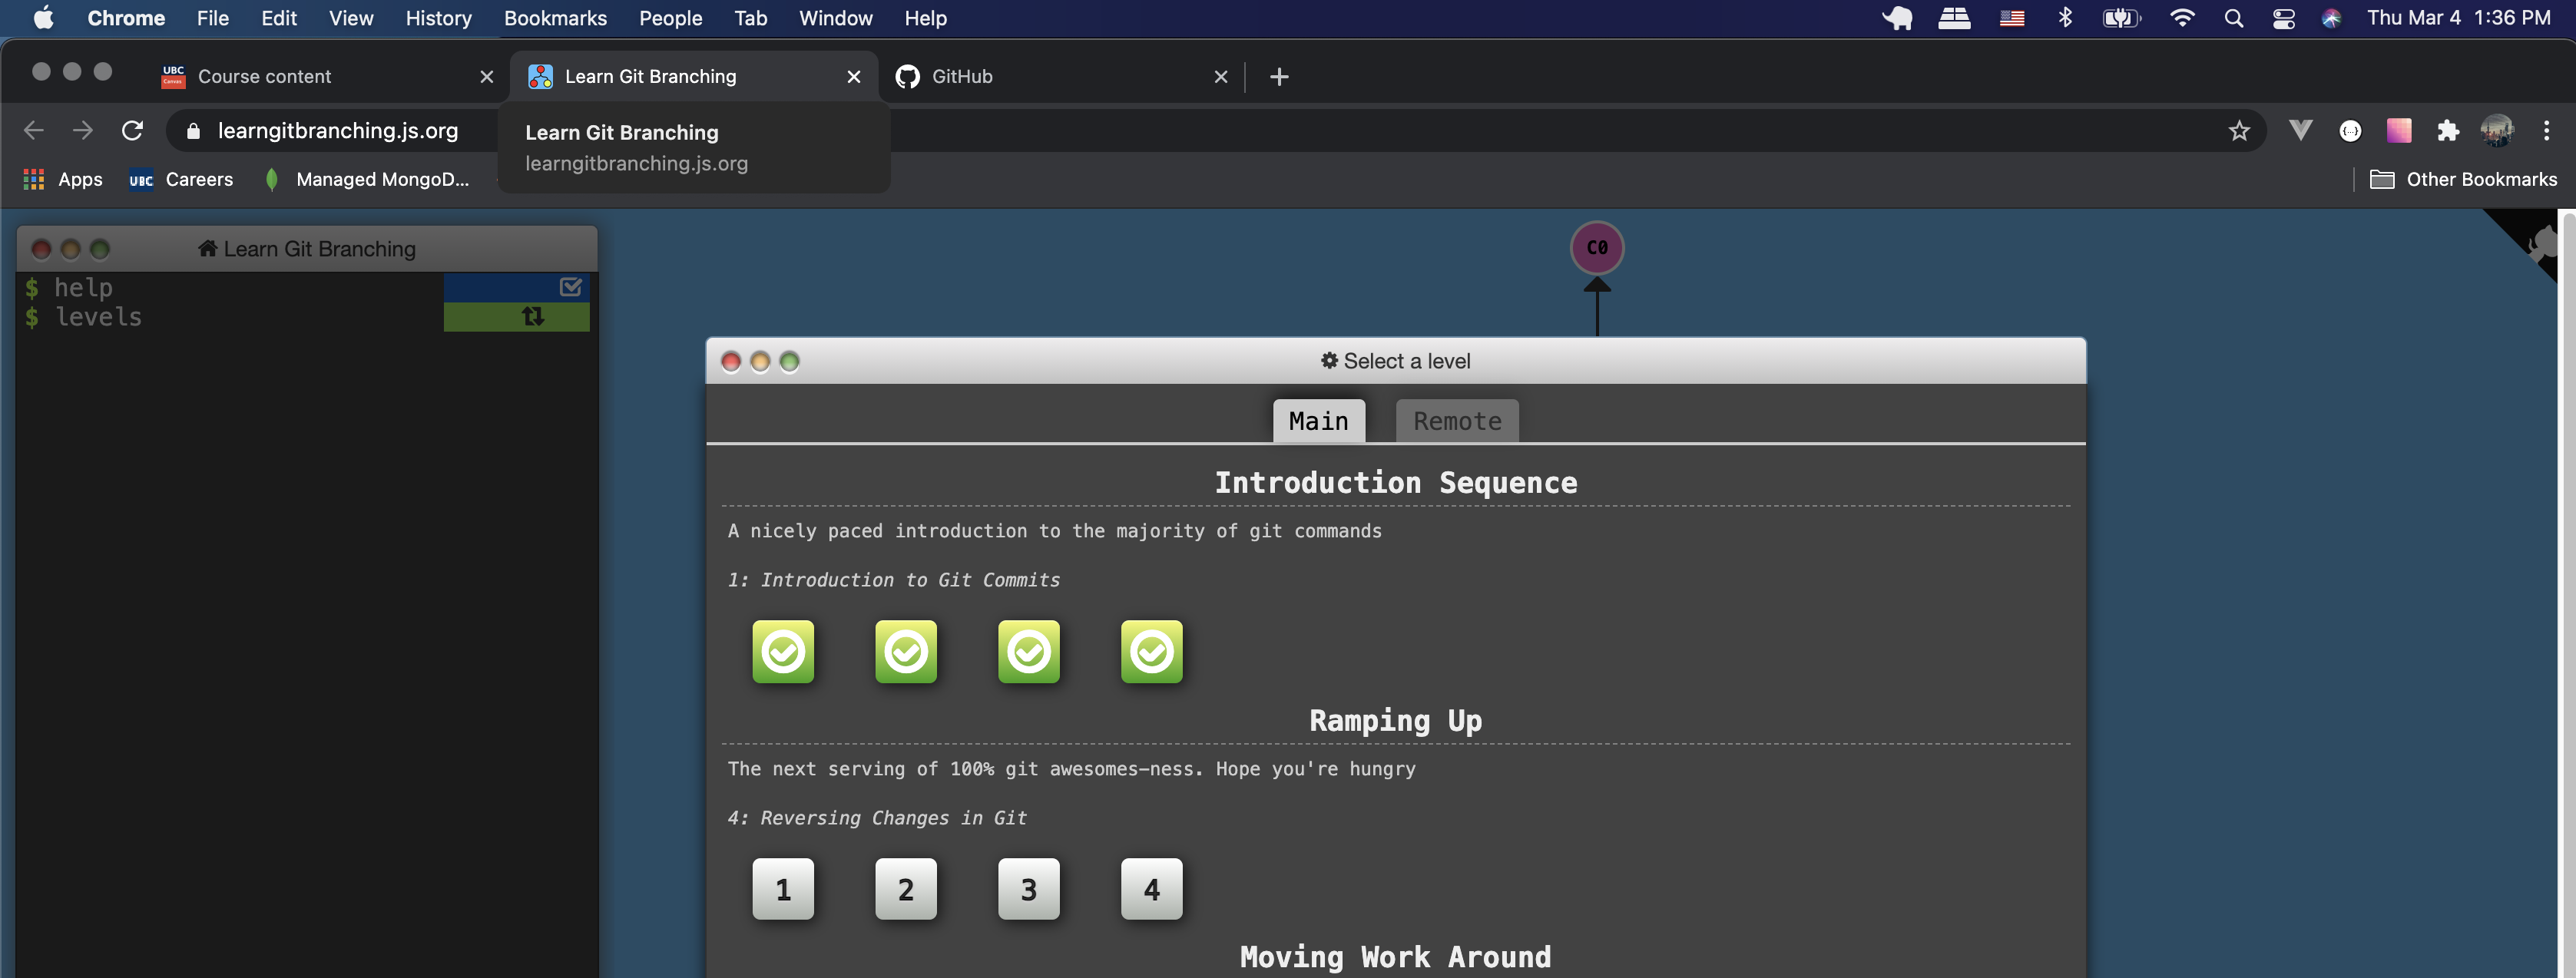

- ### “Remote: Push & Pull – Git Remotes”

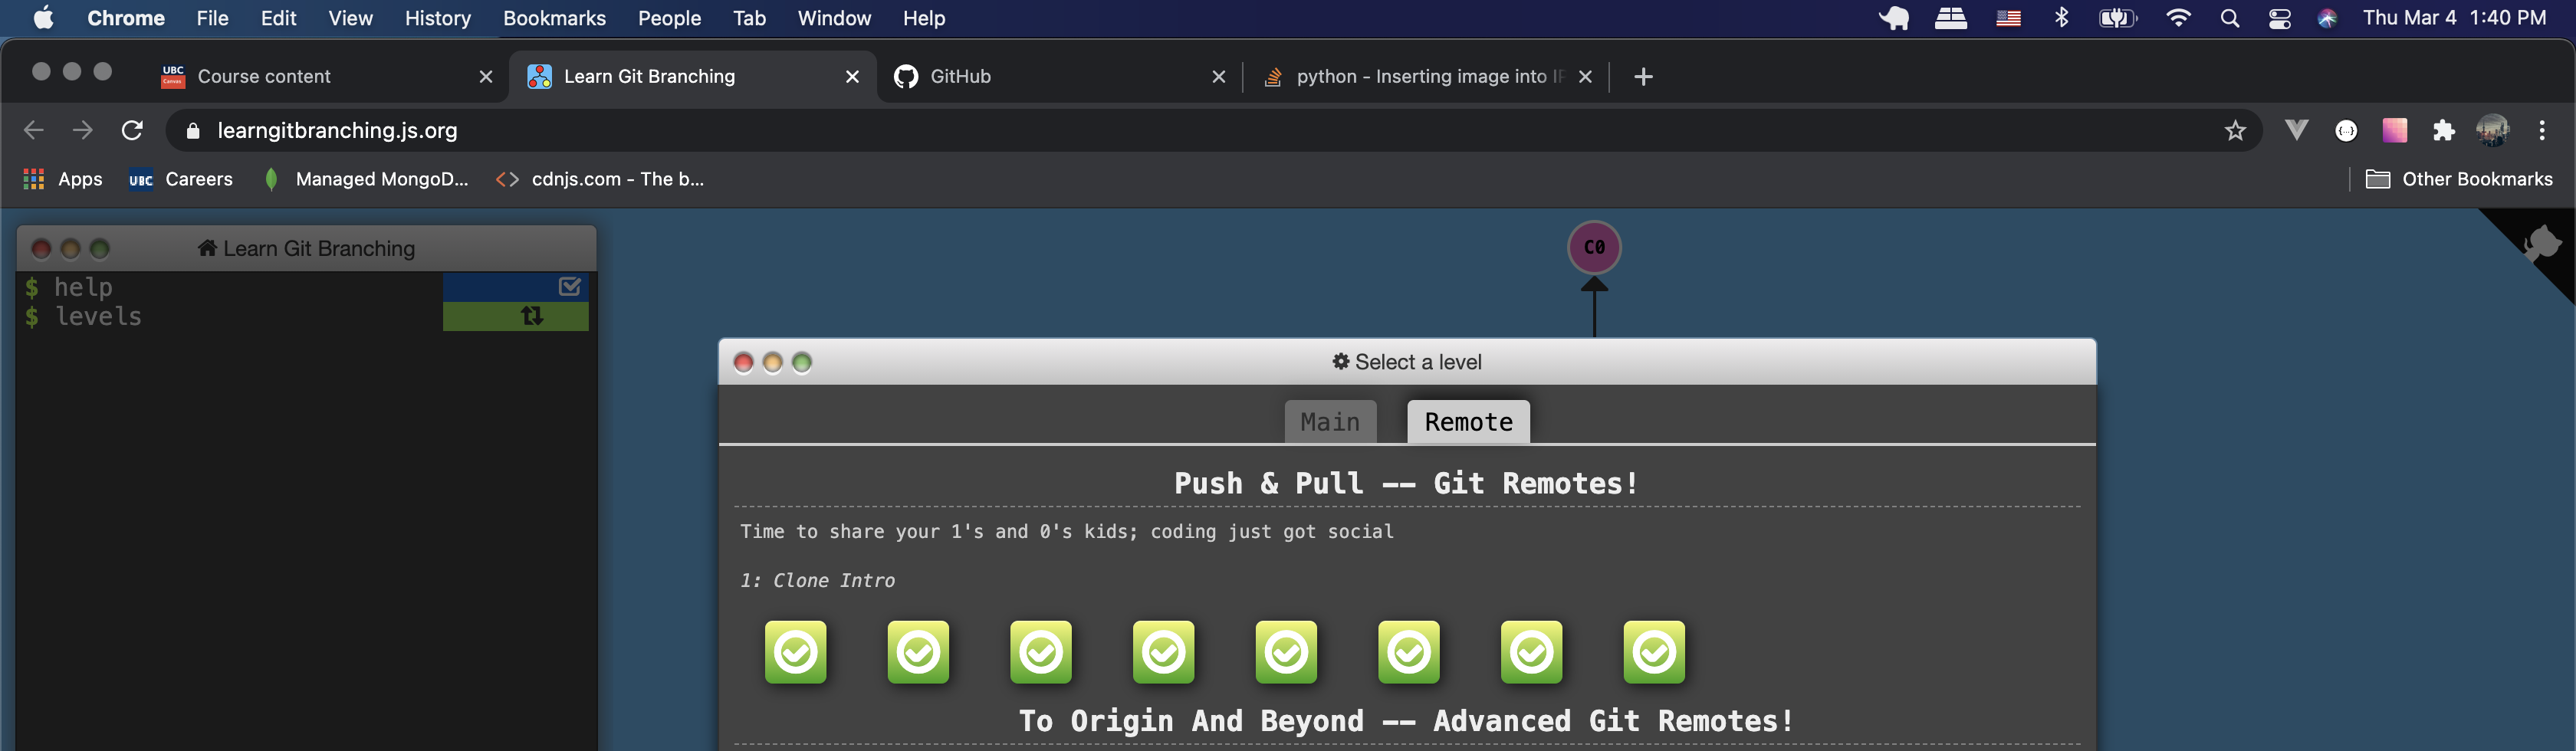

# Task 3. Method Chaining and Python Programs (25%)¶

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Method to merge all .csv files into one, so we can enter all data
def merge_data():
  data = [files for files in os.listdir(os.path.join('..', '..', 'data','raw')) if files.endswith('.csv')]
  dataFrames = []

  for i in range(len(data)):
    dataFrames.append(pd.read_csv(r"{0}/{1}".format(os.path.join('..', '..', 'data','raw'), data[i]), low_memory=False))

  result = pd.concat(dataFrames, ignore_index=True)
  return load_and_process(result)

# Method Chaining
def load_and_process(result):
  # Method Chain 1 (Load data and deal with missing data)
  df1 = (
    result
      .dropna(subset=['Junction_Control'], how='all')
      .reset_index(drop=True)
  )
  # Method Chain 2 (Create new columns, drop others, and do processing)
  df2 = (
    df1.drop(['Accident_Index', 'Urban_or_Rural_Area', 'Location_Easting_OSGR', 'Location_Northing_OSGR', 
              'LSOA_of_Accident_Location', '1st_Road_Class', 
              '1st_Road_Number', 'Special_Conditions_at_Site',
              'Light_Conditions', '2nd_Road_Class', '2nd_Road_Number', 'Junction_Detail', 
              'Local_Authority_(District)', 'Local_Authority_(Highway)', 'Longitude', 'Latitude'], axis=1)
        .reset_index(drop=True)
        .rename(columns={"Weather_Conditions": "Weather_Type", "Did_Police_Officer_Attend_Scene_of_Accident": "Police_Presense"})
        .replace({'Police_Presense': {'Yes': True, 'No': False}})
        .replace({'Day_of_Week': {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 7: 'Sunday'}})
        .convert_dtypes()
        .sort_values("Year", ascending=True)
  )
  df2['Date'] = pd.to_datetime(df2['Date'], format='%d/%m/%Y')
  return df2
merge_data()

,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Road_Type,Speed_limit,Junction_Control,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Weather_Type,Road_Surface_Conditions,Carriageway_Hazards,Police_Presense,Year
450657,92,3,1,1,2005-11-21,Tuesday,21:45,Roundabout,40,Giveway or uncontrolled,None within 50 metres,No physical crossing within 50 meters,Other,Wet/Damp,None,True,2005
786063,17,3,2,1,2005-04-19,Wednesday,01:35,Dual carriageway,30,Giveway or uncontrolled,None within 50 metres,No physical crossing within 50 meters,Fine without high winds,Dry,None,True,2005
786062,17,3,2,3,2005-04-15,Saturday,18:50,Single carriageway,30,Giveway or uncontrolled,None within 50 metres,No physical crossing within 50 meters,Raining without high winds,Wet/Damp,None,True,2005
786061,17,3,2,1,2005-02-06,Monday,12:45,Single carriageway,30,Giveway or uncontrolled,None within 50 metres,No physical crossing within 50 meters,Fine without high winds,Dry,None,False,2005
786060,17,3,2,1,2005-04-08,Saturday,13:15,Single carriageway,30,Giveway or uncontrolled,None within 50 metres,No physical crossing within 50 meters,Fine without high winds,Dry,None,True,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179124,20,3,1,1,2014-01-13,Tuesday,16:50,Single carriageway,30,Automatic traffic signal,None within 50 metres,Pedestrian phase at traffic signal junction,Raining without high winds,Wet/Damp,None,True,2014
179123,20,3,2,3,2014-01-07,Wednesday,08:16,Single carriageway,30,Giveway or uncontrolled,None within 50 metres,No physical crossing within 50 meters,Other,Wet/Damp,None,True,2014
179122,20,3,2,1,2014-01-13,Tuesday,14:05,Roundabout,30,Giveway or uncontrolled,None within 50 metres,No physical crossing within 50 meters,Fine without high winds,Wet/Damp,None,True,2014
179120,20,3,1,1,2014-01-08,Thursday,17:15,Single carriageway,30,Giveway or uncontrolled,None within 50 metres,No physical crossing within 50 meters,Raining without high winds,Wet/Damp,None,False,2014


In [1]:
from scripts import project_functions

df = project_functions.merge_data()
project_functions.process_data(df)

🚨 Started to create formatted .csv file [1/12]

🚨 Started to create formatted .csv file [2/12]

🚨 Started to create formatted .csv file [3/12]

🚨 Started to create formatted .csv file [4/12]

🚨 Started to create formatted .csv file [5/12]

🚨 Started to create formatted .csv file [6/12]

🚨 Started to create formatted .csv file [7/12]

🚨 Started to create formatted .csv file [8/12]

🚨 Started to create formatted .csv file [9/12]

🚨 Started to create formatted .csv file [10/12]

🚨 Started to create formatted .csv file [11/12]

🚨 Started to create formatted .csv file [12/12]

👍 Finished creating formatted .csv files


# Task 4: Conduct an Exploratory Data Analysis (EDA) on your dataset (30%)

## Basic Data Information

We have 901315 rows of data and 17 different columns. No missing numerical values

#### Information about columns

In [3]:
# Let's explore the general information about the dataset and see what we have
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 901315 entries, 450657 to 173868
Data columns (total 17 columns):
 #   Column                                   Non-Null Count   Dtype         
---  ------                                   --------------   -----         
 0   Police_Force                             901315 non-null  Int64         
 1   Accident_Severity                        901315 non-null  Int64         
 2   Number_of_Vehicles                       901315 non-null  Int64         
 3   Number_of_Casualties                     901315 non-null  Int64         
 4   Date                                     901315 non-null  datetime64[ns]
 5   Day_of_Week                              901315 non-null  string        
 6   Time                                     901255 non-null  string        
 7   Road_Type                                901315 non-null  string        
 8   Speed_limit                              901315 non-null  Int64         
 9   Junction_Control     

,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Road_Type,Speed_limit,Junction_Control,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Weather_Type,Road_Surface_Conditions,Carriageway_Hazards,Police_Presense,Year
450657,92,3,1,1,2005-11-21,Tuesday,21:45,Roundabout,40,Giveway or uncontrolled,None within 50 metres,No physical crossing within 50 meters,Other,Wet/Damp,None,True,2005
786063,17,3,2,1,2005-04-19,Wednesday,01:35,Dual carriageway,30,Giveway or uncontrolled,None within 50 metres,No physical crossing within 50 meters,Fine without high winds,Dry,None,True,2005
786062,17,3,2,3,2005-04-15,Saturday,18:50,Single carriageway,30,Giveway or uncontrolled,None within 50 metres,No physical crossing within 50 meters,Raining without high winds,Wet/Damp,None,True,2005
786061,17,3,2,1,2005-02-06,Monday,12:45,Single carriageway,30,Giveway or uncontrolled,None within 50 metres,No physical crossing within 50 meters,Fine without high winds,Dry,None,False,2005
786060,17,3,2,1,2005-04-08,Saturday,13:15,Single carriageway,30,Giveway or uncontrolled,None within 50 metres,No physical crossing within 50 meters,Fine without high winds,Dry,None,True,2005


#### Information about duplicate entries
Seems like result shows 23201 duplicated entries, comparing that to the data dataset, we notice that out of 901315 rows, we have about 2% duplicates, I would say that's a good sign, as we have enough unique values to answer our questions.

In [4]:
# generate count statistics of duplicate entries
if len(df[df.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(df[df.duplicated()]))
    print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
else:
    print("No duplicated entries found")

No. of duplicated entries:  23993
       Police_Force  Accident_Severity  Number_of_Vehicles  \
36434             1                  1                   1   
13295             1                  1                   1   
36409             1                  1                   1   
13270             1                  1                   1   
36403             1                  1                   1   

       Number_of_Casualties       Date Day_of_Week   Time           Road_Type  \
36434                     1 2012-01-13    Saturday  17:20  Single carriageway   
13295                     1 2012-01-13    Saturday  17:20  Single carriageway   
36409                     1 2012-01-14      Sunday  17:23      One way street   
13270                     1 2012-01-14      Sunday  17:23      One way street   
36403                     1 2012-01-16     Tuesday  12:30  Single carriageway   

       Speed_limit          Junction_Control  \
36434           30   Giveway or uncontrolled   
13295     

#### Observations from Statistical point
Interesting data to notice is police force presence, minimum is 1 unit, and maximum
is 98, seems a lit bit odd, since mean is roughly 27. Does it mean that this number is outlier or there was a major accident involved?
However, by checking the max number of vehicles involed in incident, it's possible 
to have 98 police force there.

In [5]:
df.describe()

,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Speed_limit,Year
count,901315.000000,901315.000000,901315.000000,901315.000000,901315.000000,901315.000000
mean,27.392350,2.863108,1.877528,1.331144,35.428075,2009.432804
std,24.806379,0.365861,0.602611,0.771135,11.308622,3.011951
min,1.000000,1.000000,1.000000,1.000000,10.000000,2005.000000
25%,5.000000,3.000000,2.000000,1.000000,30.000000,2006.000000
50%,21.000000,3.000000,2.000000,1.000000,30.000000,2010.000000
75%,44.000000,3.000000,2.000000,1.000000,30.000000,2012.000000
max,98.000000,3.000000,28.000000,87.000000,70.000000,2014.000000


#### Number of unique entries for each column

In [6]:
# Return Series with number of distinct observations.
df.nunique(axis = 0)

Police_Force                                 51
Accident_Severity                             3
Number_of_Vehicles                           15
Number_of_Casualties                         34
Date                                       3286
Day_of_Week                                   7
Time                                       1439
Road_Type                                     6
Speed_limit                                   8
Junction_Control                              4
Pedestrian_Crossing-Human_Control             3
Pedestrian_Crossing-Physical_Facilities       6
Weather_Type                                  9
Road_Surface_Conditions                       5
Carriageway_Hazards                           6
Police_Presense                               2
Year                                          9
dtype: int64

#### Statistical comparision between years
Let's group all information by years, and see what is the mean value for each column as we have information for 9 years.


In [7]:
df.groupby('Year').mean()

,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Speed_limit,Police_Presense
Year,,,,,,
2005,28.142579,2.873107,1.888904,1.342221,36.044342,0.785886
2006,28.498947,2.865824,1.88932,1.342993,36.01838,0.789686
2007,28.651813,2.861707,1.88618,1.342186,36.009038,0.791621
2009,28.016464,2.865105,1.879365,1.338777,35.435757,0.789634
2010,27.64421,2.869607,1.872087,1.337255,35.322815,0.790919
2011,27.761316,2.862094,1.869595,1.326292,35.174699,0.797431
2012,23.091271,2.84935,1.86648,1.33126,34.701192,0.811717
2013,27.788401,2.859061,1.867958,1.302772,35.05617,0.803986
2014,27.267665,2.861655,1.872606,1.305993,34.835012,0.805119


#### Type of Road vs Number of casulties

What type of road causes casulties in the accident? Is there a correlation between type of road and how many casulties?

Exploring the results, it seems that the single carrigeway is a leader on the number of casulties by comparing to other types of road. This seems impressive, but what factors affect it, let's look into the time of the week and speed limit.

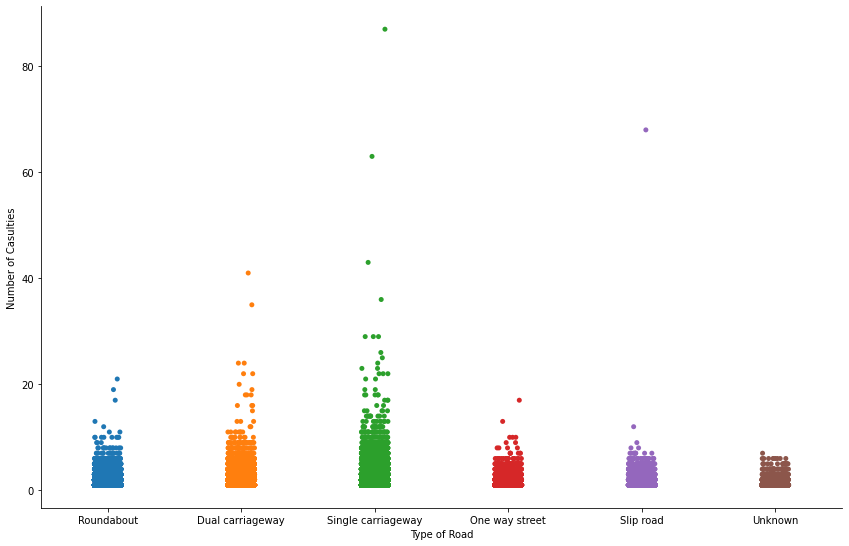

In [8]:
catplot = sns.catplot(data = df, y='Number_of_Casualties', x='Road_Type', height=7.5, aspect=11.7/7.5)

plt.ylabel("Number of Casulties")
plt.xlabel("Type of Road")
catplot

### Time of Week and Type of Road

By observing the data from the plot, we notice that most accidents with severity happen on single carriage way road, which makes sense as there is not much space for vehicles, hence, making it the most dangerous road in UK to drive.

[Text(0, 0.5, 'Number of accidents'), Text(0.5, 1.0, 'Accidents by Road Type')]

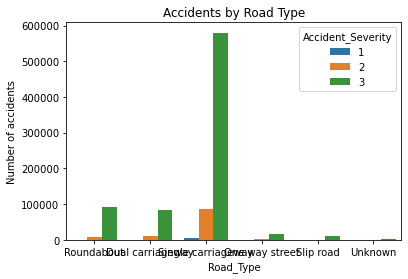

In [34]:
x = sns.countplot(x='Road_Type', data=df, hue='Accident_Severity')
x.set(ylabel='Number of accidents', title='Accidents by Road Type')

Observing the day of week, it semes that most of the data is distributed normally through the week, however, Saturday has the most number of accidents, meanwhile, Monday has lowest number of accidents comparing to other days.

[Text(0, 0.5, 'Number of accidents'),
 Text(0.5, 1.0, 'Accidents by day of week')]

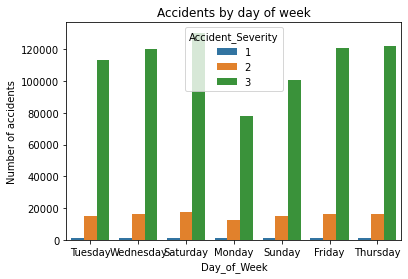

In [35]:
x = sns.countplot(x='Day_of_Week', data=df, hue='Accident_Severity')
x.set(ylabel='Number of accidents', title='Accidents by day of week')

### Vehicles involved in accident through years

Through different year, the data may vary as different conditions affect the situation on roads, so it's necessary to check if the data through years was different.

Looking at the scatterplot, seems that number of vechiles involved in accident doesn't change significantly, by looking to the previous tables with mean, the numbers are similar.

<AxesSubplot:xlabel='Year', ylabel='Number_of_Vehicles'>

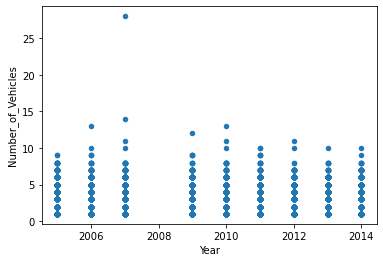

In [13]:
df.plot(kind='scatter', x='Year', y='Number_of_Vehicles')

Looking on the surface conditions on the roads, it seems odd that most of the accidents happen on the dry road. I expected more accidents to happen on snowy or frost roads. However, this is probably normal as people tend to drive more careful in winter.

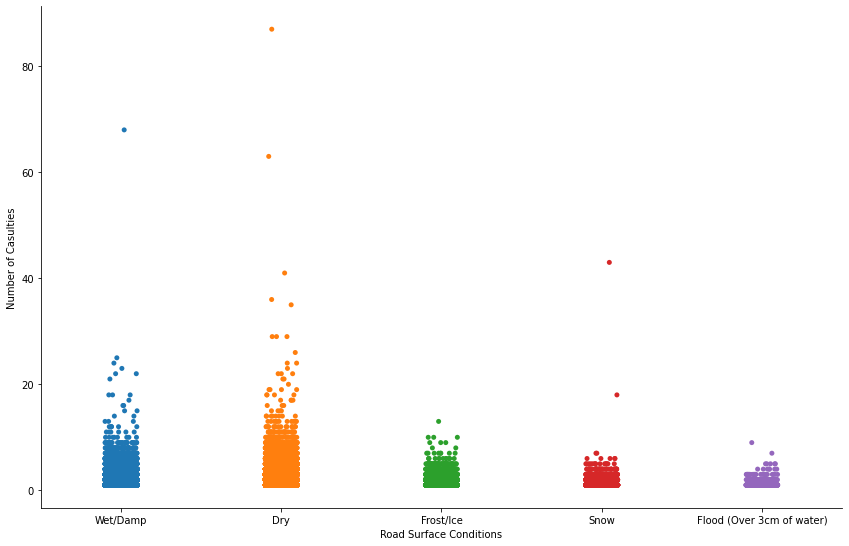

In [14]:
catplot = sns.catplot(data = df, y='Number_of_Casualties', x='Road_Surface_Conditions', height=7.5, aspect=11.7/7.5)

plt.ylabel("Number of Casulties")
plt.xlabel("Road Surface Conditions")
catplot